
count[Yes] 5297 count[No]- 39914
Size of dataset- 45211
Test: Age- 60 , Salary- 40000
prediction result- no
person with age-60 and Account balance-40000, not opt for  term insurance


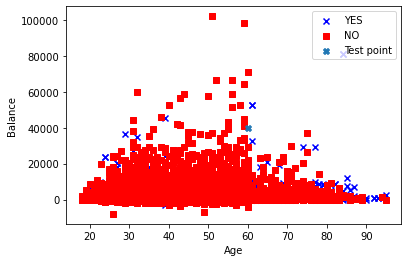

In [35]:
from math import sqrt
import pandas as pd
from csv import reader
import numpy  as np
import matplotlib.pyplot as plt 
import random

class style: BOLD = '\033[1m' ; END = '\033[0m';  WARNING = '\033[91m';under='\u0332'
print(style.BOLD);   
def insert_data(filename):
    dataset = list()
    with open(filename, 'r') as file:  
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset


# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    #print("euc data-",row1, row2)
    #print(len(row1))
    for i in range(len(row1)-1):#runninh loop for first 2 vairbale diffrence onlu
        
        distance += (row1[i] - row2[i])**2
        #print(row1[i], row2[i], distance)
    #print(row1, row2, distance)    
    return sqrt(distance)

##----find k neigbhors
def find_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        #print("train-row",train_row)
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
     
    #print(distances[1:10])
    distances.sort(key=lambda tup: tup[1]) #sorting dataset based on distance
    #print(distances[1:10])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    #storing the datset into new list equal to K
    #print(neighbors[1:10])
    return neighbors

# Make a classification prediction with neighbors
def predict_class(neighbors):
    #print(neighbors)
    output_values = [row[-1] for row in neighbors] #outcome  value storing
    #print(output_values)
    
    #rint(set(output_values),output_values.count)
    prediction = max(set(output_values), key=output_values.count)
    #rint(prediction)
    return prediction

#-----------file insert------------------------
filename='bank.csv'  
dataset = insert_data(filename) #dataset = list(zip(*dataset))
arr = np.array(dataset)
#print(arr)

#----------------variable initisation------------
dataset=[]
x1_y=[] #initilaisise variable to yes pointts on graph
x1_n=[] #initilaisise variable to no pointts on graph
x2_y=[]  #initialise x2 for yes point on graph  
x2_n=[]  #initilaise x2  for ni piunts
y_c=0
yn=0
#----------------filtering data from CSV
for i in range (len(arr)):
    X1=float(arr[i][0])   #x1
    X2=float(arr[i][5])  #X2
    Y=arr[i][-1]         #picking outcome colum
    dataset.append([X1,X2, Y])
    if Y == 'yes' :
        #print(X1)
        x1_y.extend([X1]) #storing point for graph yes
        x2_y.append([X2])
        y_c=y_c+1
        
    else :
        x1_n.append([X1])   #x1,x2 for no
        x2_n.append([X2])
        yn=yn+1
        

print("count[Yes]",y_c, "count[No]-",yn)
print("Size of dataset-", y_c+yn)

#-----------main program--------------

test=[60,40000] ;print("Test: Age-",test[0], ", Salary-",test[1])#x1_tes. x2_test
k=111  #k value to find neihbors

neighbors = find_neighbors(dataset, test, k)
#print(neighbors)

result = predict_class(neighbors)
print("prediction result-",result)

class_label="opt for" if result =="Yes"  else "not opt for"
#rint(class_label)
print(f"person with age-{test[0]} and Account balance-{test[1]}, {class_label}  term insurance")
#------------graph plotting----------------

plt.scatter(x1_y,x2_y, c='b', marker='x', label='YES')
plt.scatter(x1_n,x2_n, c='r', marker='s', label='NO')
plt.scatter(test[0], test[1], marker='X', label='Test point', cmap='viridis')
plt.legend(loc='upper right')
plt.xlabel('Age')  # to plot A on X-axis
plt.ylabel('Balance')   #to plot B on Y 
plt.show()


#### 